# Aproximación a $\pi$ por medio de Monte Carlo Acierto y Error (Hit or Miss) con METODOLOGÍA

### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

# Ejercicio

Aproximar el valor del número pi ($\pi$) utilizando Monte Carlo Acierto y Error (Hit or Miss)
1. Analíticamente.
2. Mediante simulación.

# **Analiticamente**

Recordemos que el área de un círculo es $A=\pi r^2$, entonces con un $r=1$ aproximaremos a un $A=\pi$, que es lo que buscamos inicialmente con el problema. Dado que queremos trabajar con Monte Carlo Acierto y error, se plantea la siguiente integral 
\begin{equation*}
\begin{aligned}
 I = \int_0^1 \sqrt{1-x^2} \quad dx
\end{aligned}
\end{equation*}
 que corresponde a un cuarto de círculo de radio igual a 1, representando en un cuadrante como se ve a continuación
<img src="sqrt(1-x^2).jpg" alt="" width="400" height="200">

Resolvemos la integral por sustitución trigonométrica:
$x=sin(u) \implies u=arcsin(x), dx=cos(u)$, así:
\begin{equation*}
\begin{aligned}
 I = \int_0^1 \sqrt{1-x^2} \quad dx= \int_0^1 cos(u) \sqrt{1-sin^2(u)} \quad du
\end{aligned}
\end{equation*}
De la identidad $cos^2(u)=1-sin^2(u)$ podemos simplificar 
\begin{equation*}
\begin{aligned}
 \int_0^1 cos(u) \sqrt{cos^2(u)} \quad du =  \int_0^1 cos^2(u) \quad du 
\end{aligned}
\end{equation*}
pero  $cos^2(u)=\frac{1+cos(2x)}{2}$, entonces
\begin{equation*}
\begin{aligned}
\int_0^1 &\frac{1+cos(2x)}{2} \quad du = \left[\frac{x}{2}+\frac{1}{2}\left(\frac{1}{2}sen(2u)\right)\right]_0^1
\end{aligned}
\end{equation*}
Y regresando a la sustitución esto es igual a 
\begin{equation*}
\begin{aligned}
\left[\frac{x}{2}+\frac{1}{4}sen(2arcsin(x))\right]_0^1=\left[\frac{arcsin(x)}{2}+\frac{1}{4}(2x\sqrt{1-x^2})\right]_0^1=\left[\frac{arcsin(x)}{2}+\frac{1}{2}(x\sqrt{1-x^2})\right]_0^1
\end{aligned}
\end{equation*}
Finalmente obtenemos que 
\begin{gather*}
I = \int_0^1 \sqrt{1-x^2} \quad dx= \frac{\pi}{4}
\end{gather*}

Pero recordemos que esta integral, solo representa un cuarto del círculo, por lo que debemos multiplicar este resultado por 4, para obtener el valor de $\pi$ requerido, es decir $A=I*4=\frac{\pi}{4}*4=\pi$.




# **Por simulación: Construimos el modelo en varios pasos.**

**PASO 1**. Defina las variables que intervienen en el modelo.

Definimos $u_1, u_2 \sim U(0,1)$, como varibles aleatorias que nos sirven generar muestras aleatorias de una distribución específica, lo que nos servira para estimar la integral antes planteada.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$
f(u_1) = 
\begin{cases} 
1 & \text{si } 0 \leq u_1 \leq 1 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$

$$
f(u_2) = 
\begin{cases} 
1 & \text{si } 0 \leq u_2 \leq 1 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(u_1) = 
\begin{cases} 
0 & \text{si } u_1 < 0 \\
u_1 & \text{si } 0 \leq u_1 \leq 1 \\
1 & \text{si } u_1 > 1
\end{cases}
$$

$$
F(u_2) = 
\begin{cases} 
0 & \text{si } u_2 < 0 \\
u_2 & \text{si } 0 \leq u_2\leq 1 \\
1 & \text{si } u_2 > 1
\end{cases}
$$

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

**PASO 5**. Genere números aleatorios.

In [155]:
import numpy as np
import random
u = random.uniform(0,1)
u

0.45633537994872186

**PASO 6**. Simule un lanzamiento

Del algoritmo de Monte Carlo Acierto y Error, $(u_{1_i},u_{2_i})$ forman pares ordenados, y se calcula $X_i=a+u_{1_i}(b-a)$ y enseguida $g(X_i)$ 
entonces $N_H$ cuenta el numero "aciertos", es decir, las veces que el punto cae debajo de la integral, y esto pasa cuando se cumple que $g(X_i)>c u_{2_i}$.

$a,b$ y $c$ se eligen de tal forma que formen un área rectangular que contenga la región sobre la cual se está integrando.
<img src="0229241339~2.jpg" alt="" width="400" height="200">

Si $g(X_i) > cu_2$ 

¿Ocurre lo de arriba? = **Acierto = 1**

Si $g(X_i) \leq cu_2$ 

¿Ocurre lo de arriba? = **Error = 0**


Ejemplo:

Con $a=0, b=1$ y $c=2$

$(u_{1_1},u_{2_1})=(0.797,0.135) \implies X_1=u_{1_1}$, así $g(X_1)=0.603$

¿Se cumple la condicion $0.603>2 * 0.135$? = Acierto

$(u_{1_2},u_{2_2})=(0.917,0.489) \implies X_2=u_{1_2}$, así $g(X_2)=0.3988$

¿Se cumple la condicion $0.3988>2 * 0.489$? = Error

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [156]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [157]:
def funcion(x): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return math.sqrt(1-x**2)

In [158]:
def experimentos(n): #Definimos una funcion que realizara 
  a=0 #limite inferior de la integral
  b=1 #limite superior de la integral
  c = 2 #Funcion que acota por arriba la funcion a integrar.
  aciertos = 0 #Contador de la cantidad de veces que se cumple la condicion de monte carlo acierto y error.
  area=[] #Guardara las aproximaciones del área bajo la curva de la función.
  ensayos=[]
  for i in range(1,n+1):
      u1=(random.random()) #Generamos un número aleatorio en (0,1)
      u2=(random.random()) #Generamos un segundo número aleatorio e independiente en (0,1)
      x = (b-a)*u1+a #Utilizamos la tranformada inversa para traslar el U1 en el intervalo (0,1) al intervalo de interes (intervalo en donde se integra)
      g_x = funcion(x) #Evaluamos la función a integrar en el aleatorio X generado anteriormente. 
      if g_x > c*u2: #Condición de Monte Carlo de Acierto y Error. 
        aciertos += 1 #Si se cumple la condición anterior, aumenta el contador el 1.
      ensayos.append(i)
      area.append(c*(b-a)*aciertos*4/i) #Recordando que el área bajo la curva de esa integral nos da \pi/4, entonces necesitamos multiplicar
      #el área bajo la curva en cada iteración por 4 para aproximarnos al valor de pi. 
  return area #Regresamos una lista de las aproxiamciones al valor de pi en la iteracion i. 

In [159]:
exp = experimentos(5000) #Hara el experimento antes descrito 5000 veces, es decir, nos dara 5000 aproximaciones de pi para ver cuando se logra estabilizar.

In [160]:
np.mean(exp) #Saca la media de los experimentos, eso nos dará una idea de la aproximación al valor de pi

3.3298426954686438

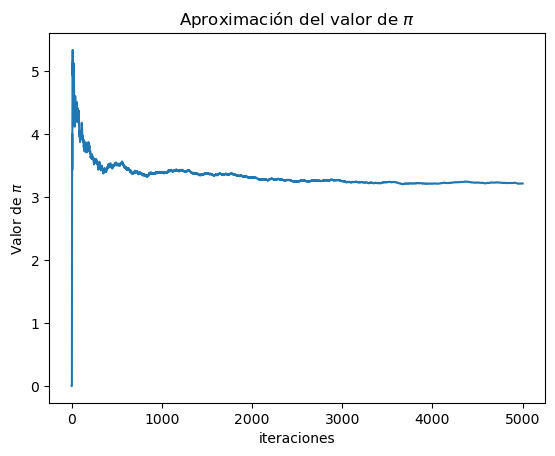

In [161]:
plt.plot(exp) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experiemntos realizada.
plt.xlabel('iteraciones')
plt.ylabel('Valor de $\pi$')
plt.title('Aproximación del valor de $\pi$')
plt.show()

**PASO 8**. Replique el modelo.

In [162]:
def valor_pi(repeticiones): #Esta función hara la simulacion anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(2000))) #Calcula la media de 2000 experiementos unas N (repeticiones) cantidad de veces.
    return Area #Nos regresa N (repeticiones) medias de 2000 experiemntos cada una.

In [163]:
N=100
simulacion = valor_pi(N)

In [164]:
np.mean(simulacion) #Saca la media de las N simulaciones realizadas, eso nos dará una mejor de la aproximación al valor de pi

3.146041777319425

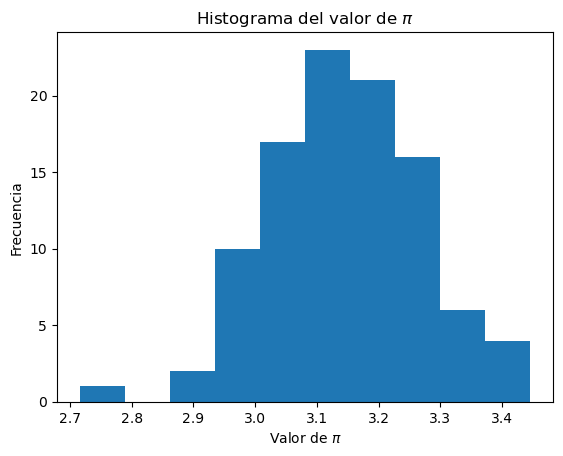

In [165]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor de pi de las N simualciones con 2000 experiementos cada una.
plt.xlabel('Valor de $\pi$')
plt.ylabel('Frecuencia')
plt.title('Histograma del valor de $\pi$')
plt.show()

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación 
estándar.

In [166]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de $\pi$ con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [167]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  3.1217874286666527 < μ < 3.1702961259721976
